In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

In [101]:
df = pd.read_csv("House_price_clean.csv")
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
2,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
3,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
4,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,0,2,2008,WD,Normal,129500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     721 non-null    int64  
 1   MSZoning       721 non-null    object 
 2   LotFrontage    721 non-null    float64
 3   LotArea        721 non-null    int64  
 4   Street         721 non-null    object 
 5   LotShape       721 non-null    object 
 6   LandContour    721 non-null    object 
 7   Utilities      721 non-null    object 
 8   LotConfig      721 non-null    object 
 9   LandSlope      721 non-null    object 
 10  Neighborhood   721 non-null    object 
 11  Condition1     721 non-null    object 
 12  Condition2     721 non-null    object 
 13  BldgType       721 non-null    object 
 14  HouseStyle     721 non-null    object 
 15  OverallQual    721 non-null    int64  
 16  OverallCond    721 non-null    int64  
 17  YearBuilt      721 non-null    int64  
 18  YearRemodA

In [102]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

### Tranformacion distribucion

In [103]:
numerica = X.select_dtypes(exclude=['object'])

In [7]:
numerica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     721 non-null    int64  
 1   LotFrontage    721 non-null    float64
 2   LotArea        721 non-null    int64  
 3   OverallQual    721 non-null    int64  
 4   OverallCond    721 non-null    int64  
 5   YearBuilt      721 non-null    int64  
 6   YearRemodAdd   721 non-null    int64  
 7   MasVnrArea     721 non-null    float64
 8   BsmtFinSF1     721 non-null    int64  
 9   BsmtFinSF2     721 non-null    int64  
 10  BsmtUnfSF      721 non-null    int64  
 11  TotalBsmtSF    721 non-null    int64  
 12  1stFlrSF       721 non-null    int64  
 13  2ndFlrSF       721 non-null    int64  
 14  LowQualFinSF   721 non-null    int64  
 15  GrLivArea      721 non-null    int64  
 16  BsmtFullBath   721 non-null    int64  
 17  BsmtHalfBath   721 non-null    int64  
 18  FullBath  

In [104]:
# Aplicar la transformación de Box-Cox
# Crear un DataFrame vacío para almacenar las columnas transformadas
transformed_df = pd.DataFrame()

# Iterar a través de las columnas numéricas y aplicar la transformación logarítmica
for col in numerica.columns:
    transformed_col = np.log(numerica[col] + 1)  # Logaritmo natural (base e)
    # Si deseas logaritmo en base 10, usa np.log10 en lugar de np.log

    transformed_df[col] = transformed_col

In [105]:
transformed_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,4.110874,4.189655,9.042040,2.079442,1.791759,7.602900,7.602900,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,0.693147,0.0,1.098612,0.693147,1.386294,0.693147,2.197225,0.000000,7.602900,1.098612,6.308098,0.000000,4.127134,0.0,0.0,0.0,0.0,0.0,1.098612,7.605392
1,4.110874,4.234107,9.328212,2.079442,1.791759,7.601902,7.602401,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,0.693147,0.0,1.098612,0.693147,1.386294,0.693147,1.945910,0.693147,7.601902,1.098612,6.411818,0.000000,3.761200,0.0,0.0,0.0,0.0,0.0,2.302585,7.605392
2,4.110874,4.442651,9.565284,2.197225,1.791759,7.601402,7.601402,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,0.693147,0.0,1.098612,0.693147,1.609438,0.693147,2.302585,0.693147,7.601402,1.386294,6.729824,5.262690,4.442651,0.0,0.0,0.0,0.0,0.0,2.564949,7.605392
3,3.044522,4.330733,9.218804,2.197225,1.791759,7.603399,7.603898,5.231109,7.222566,0.0,5.762051,7.430707,7.435438,0.000000,0.0,7.435438,0.693147,0.0,1.098612,0.000000,1.386294,0.693147,2.079442,0.693147,7.603399,1.098612,6.456770,5.545177,4.060443,0.0,0.0,0.0,0.0,0.0,2.197225,7.604894
4,3.044522,4.262680,9.323758,1.791759,1.791759,7.583756,7.583756,0.000000,6.810142,0.0,4.905275,6.947937,6.947937,0.000000,0.0,6.947937,0.693147,0.0,0.693147,0.000000,1.386294,0.693147,1.791759,0.000000,7.583756,0.693147,5.953243,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.098612,7.605392


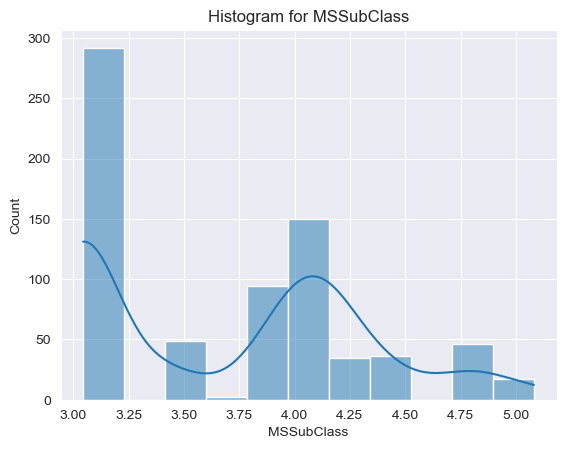

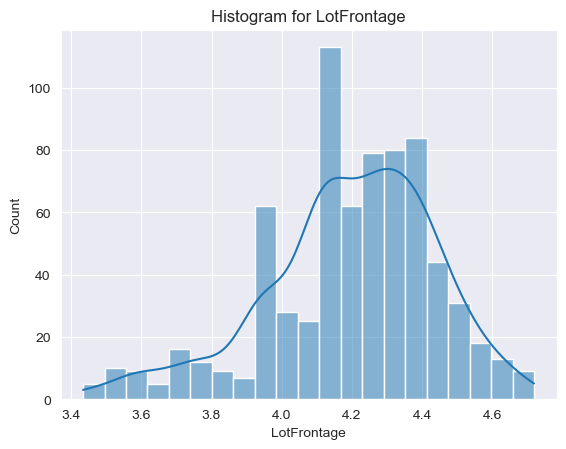

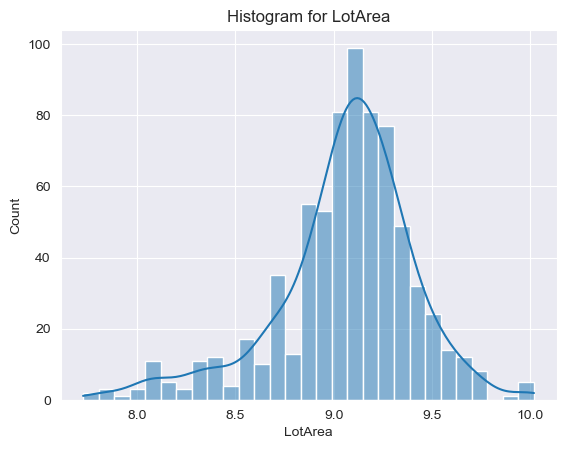

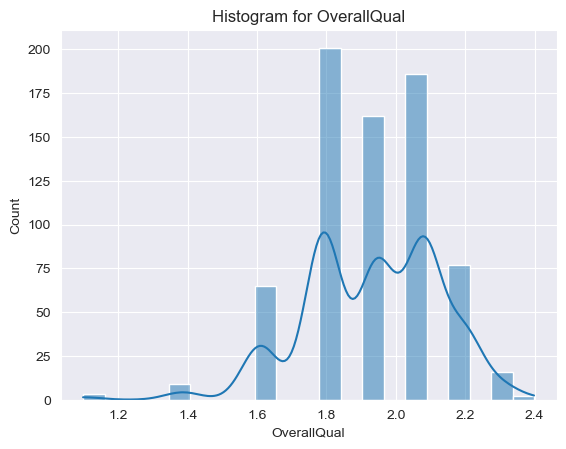

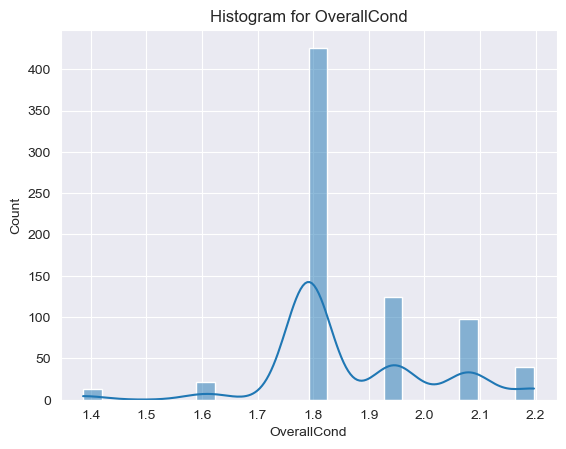

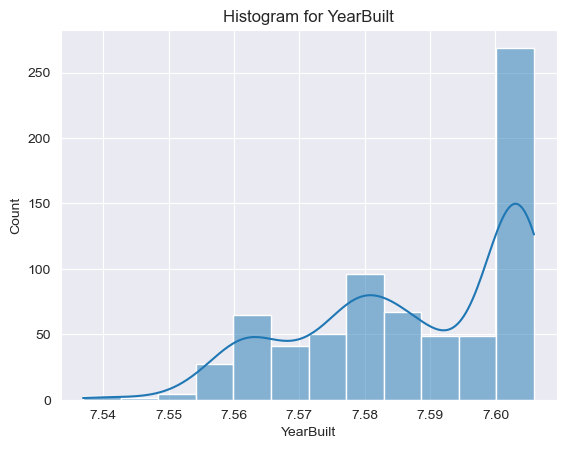

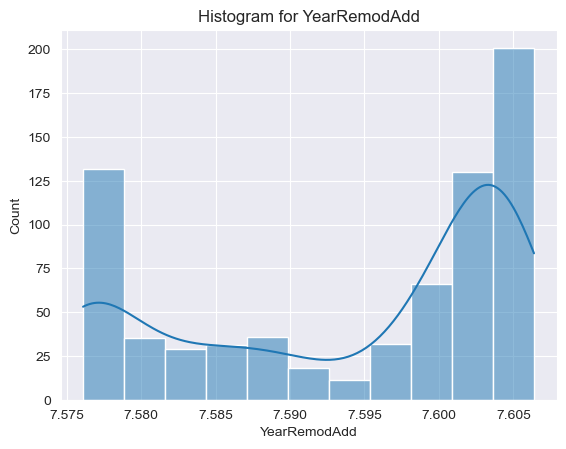

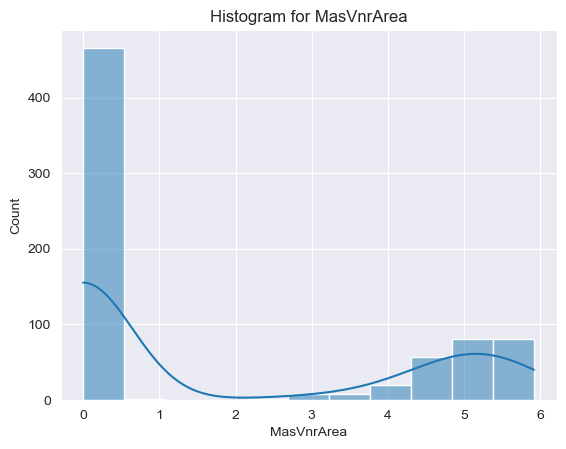

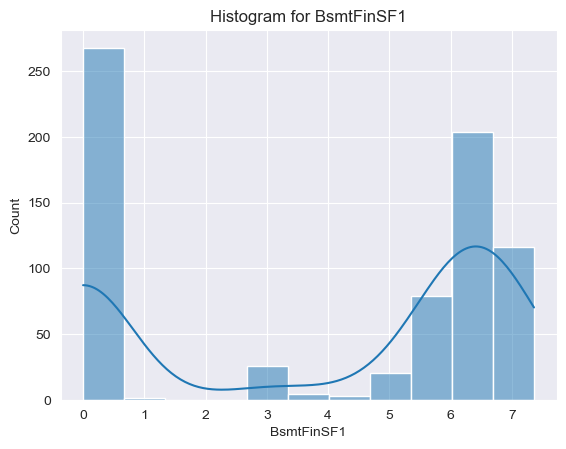

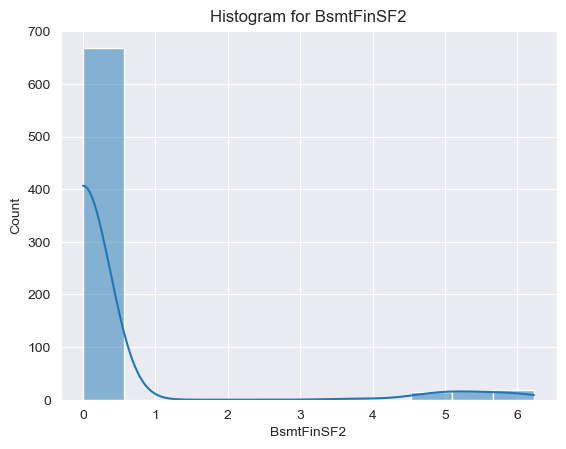

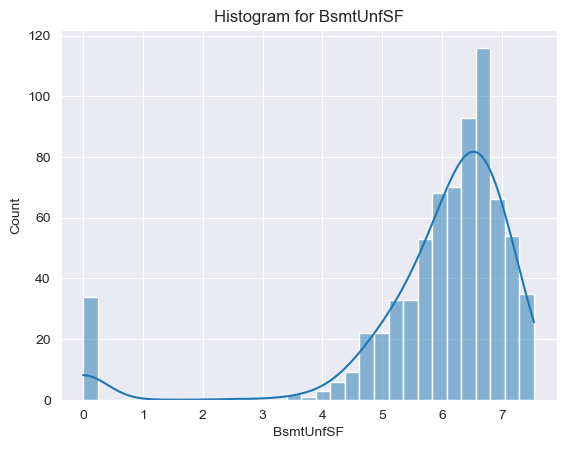

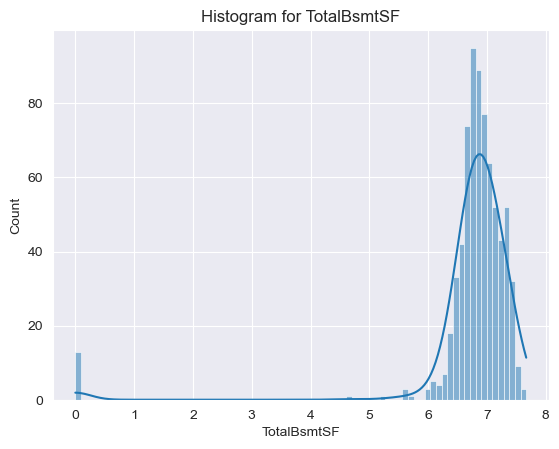

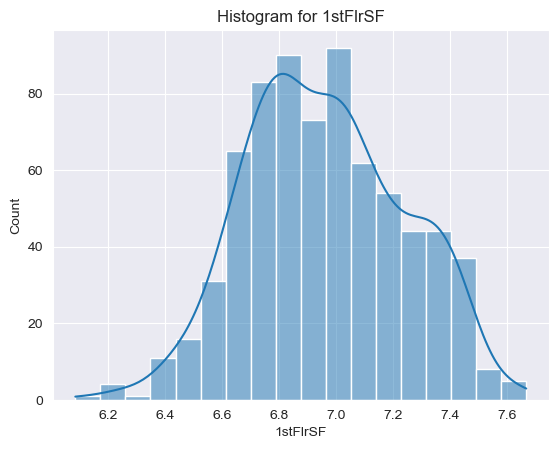

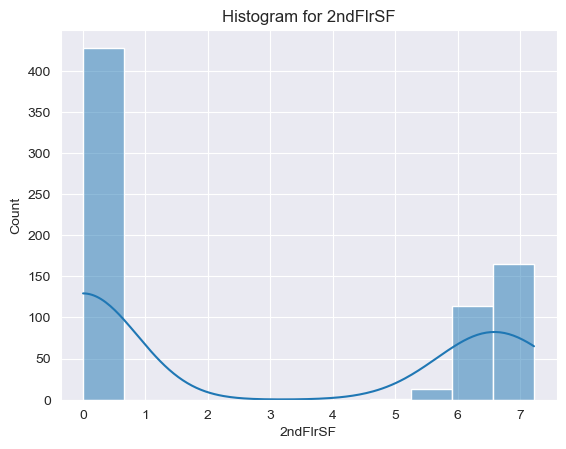

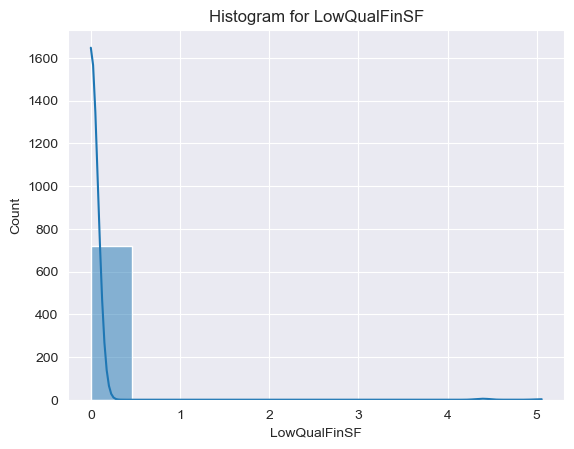

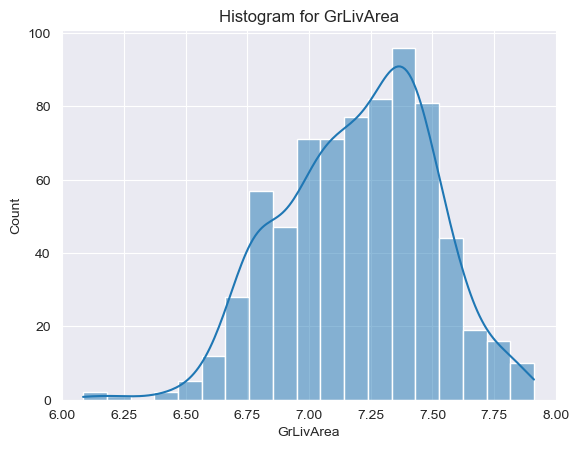

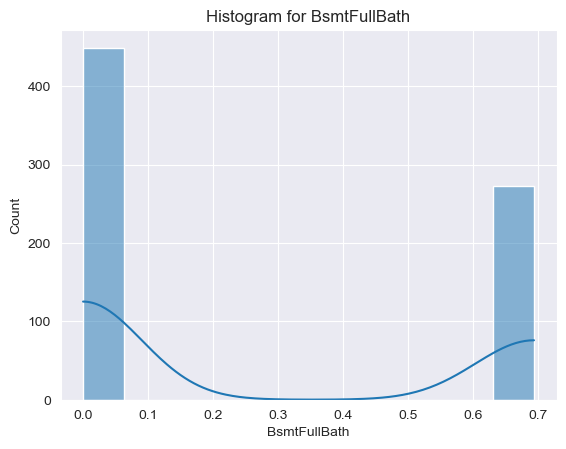

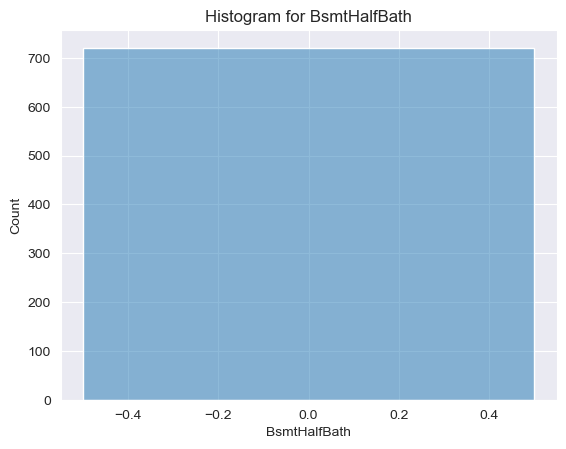

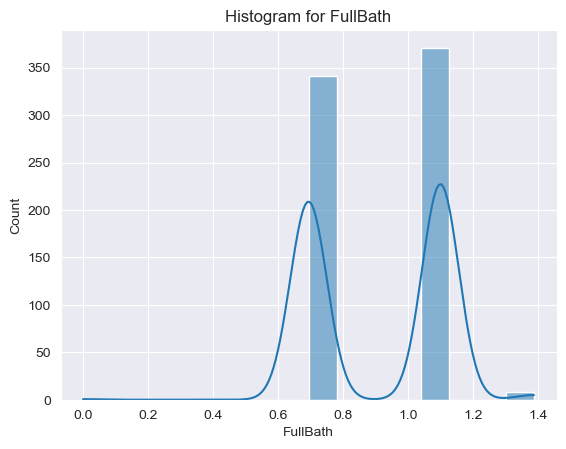

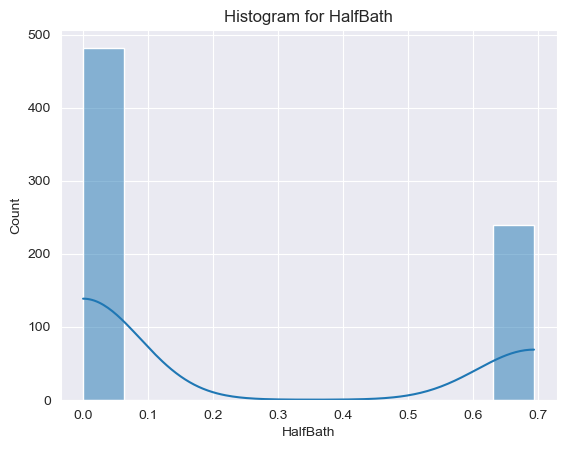

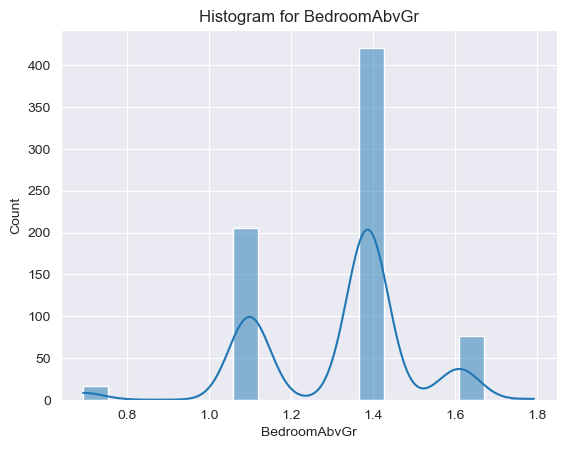

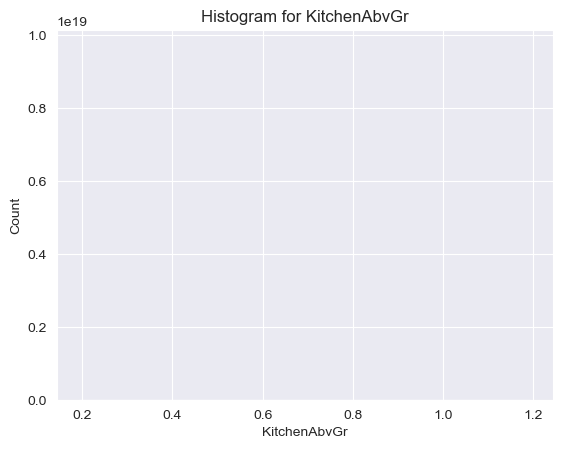

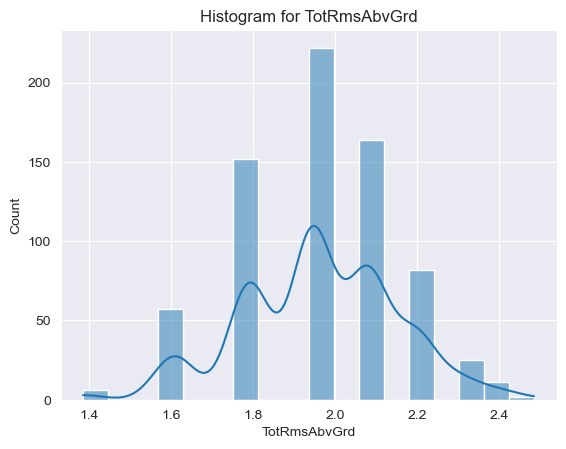

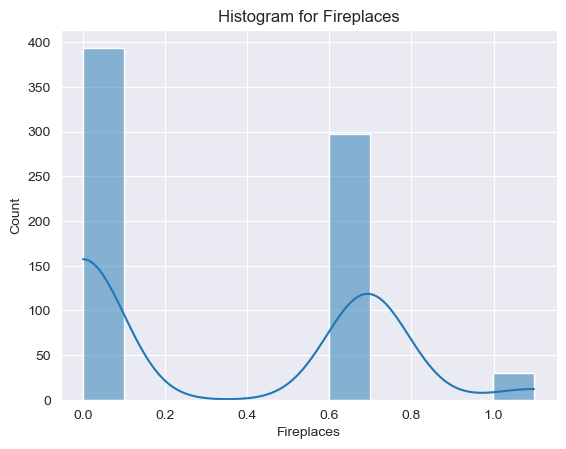

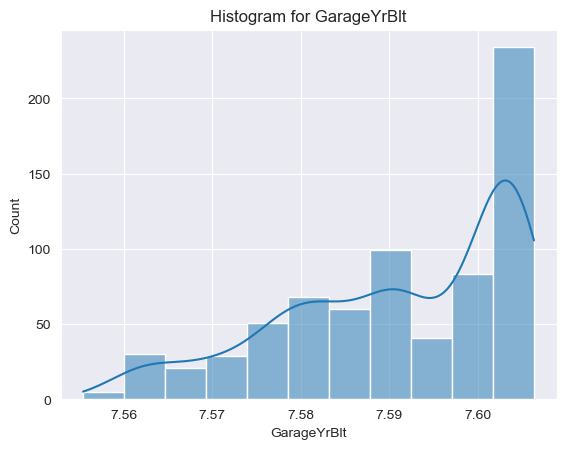

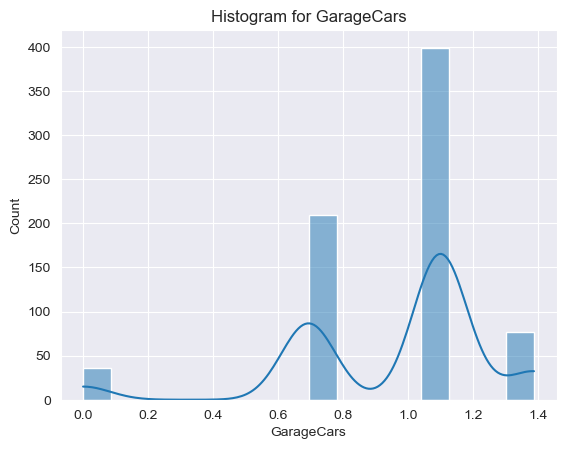

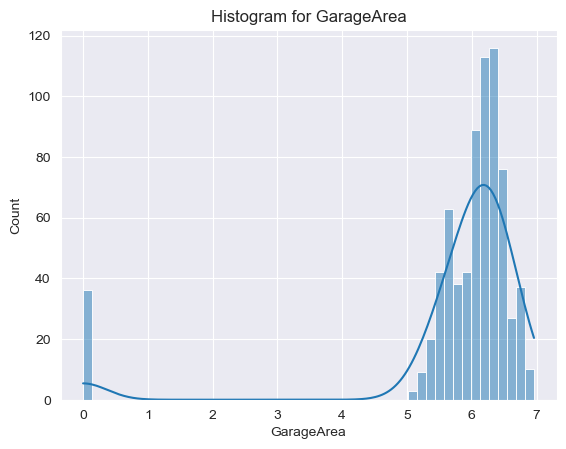

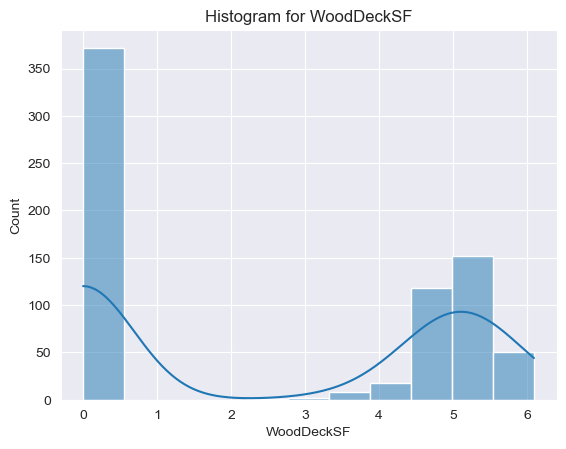

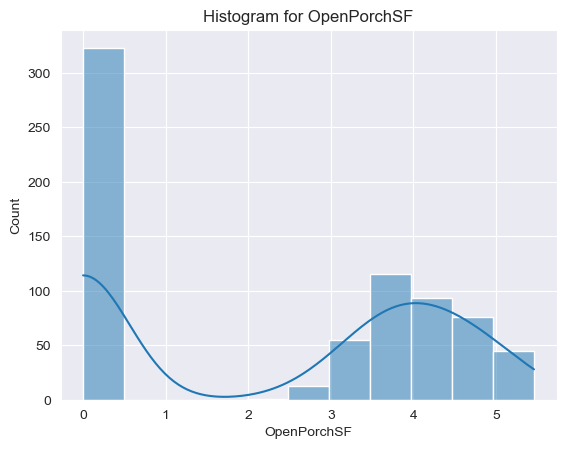

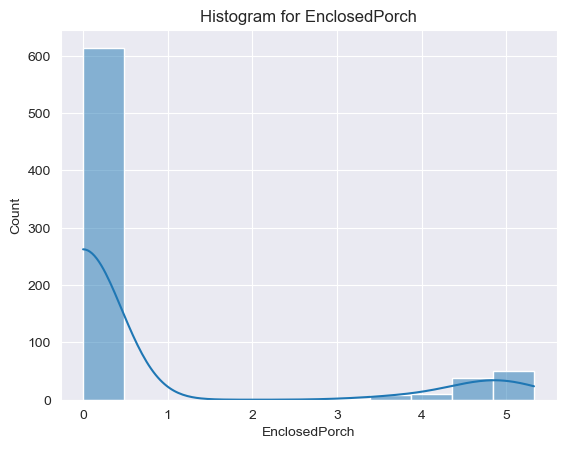

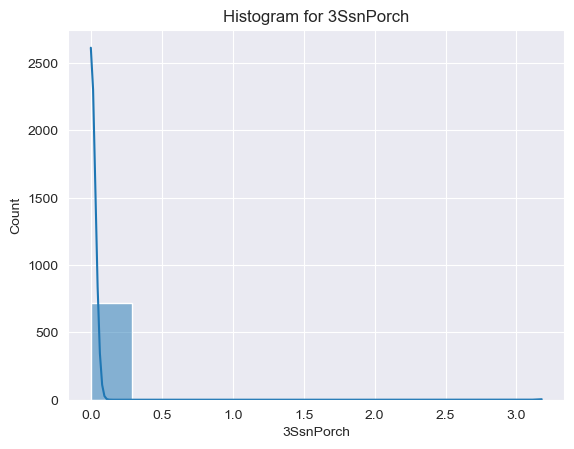

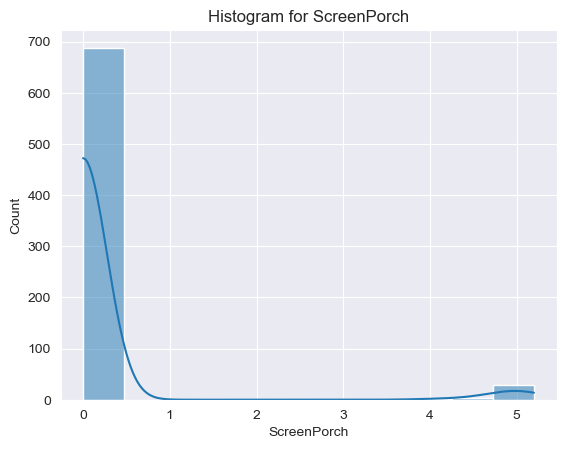

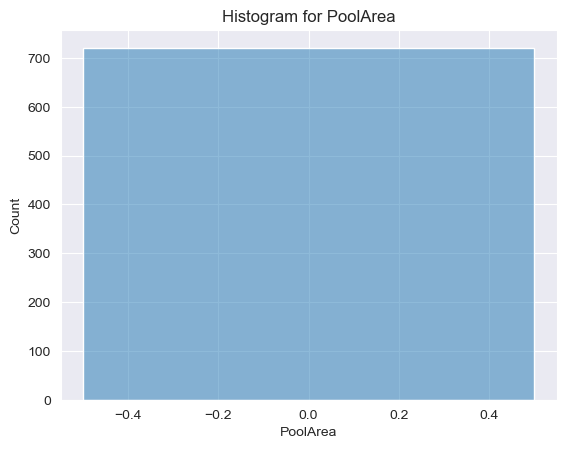

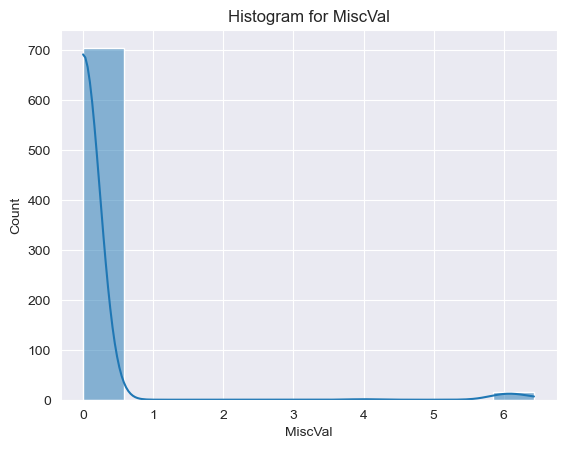

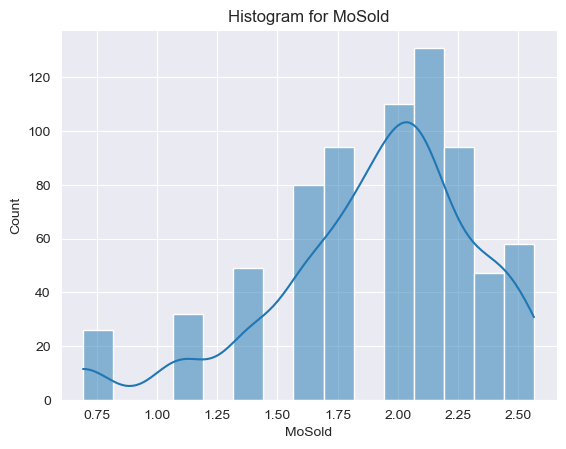

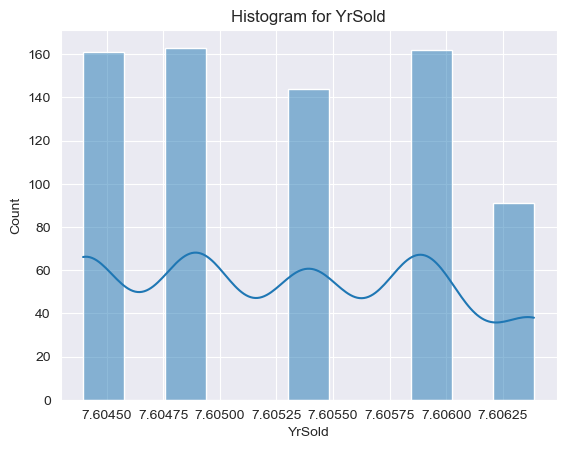

In [46]:
for i in transformed_df.columns:
    sns.histplot(data = transformed_df[i], kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

### codificacion categoricas y escalado numericas

In [106]:
categoricas = X.select_dtypes(include=['object'])

In [10]:
categoricas.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Hip,CompShg,HdBoard,HdBoard,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal


In [107]:
#escalado
scaler = StandardScaler()

In [108]:
numericas_escalado = transformed_df.select_dtypes(exclude=['object'])

In [109]:
featureName = numericas_escalado.columns

In [110]:
dataset_X = scaler.fit_transform(numericas_escalado)

In [111]:
dataset_X = pd.DataFrame(dataset_X, columns=featureName)

In [112]:
dataset= pd.concat([dataset_X, categoricas], axis = 1)

In [113]:
dataset.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,0.667912,-0.018055,-0.046132,0.750756,-0.498976,0.959951,0.793400,1.468562,0.884691,-0.276747,-0.603585,-0.009345,-0.750458,1.263633,-0.064492,0.812505,1.284809,0.0,0.904107,1.420118,0.391926,0.0,1.242437,-0.890334,0.915852,0.455590,0.364782,-0.959039,0.895534,-0.415064,-0.037268,-0.218608,0.0,-0.150036,-1.909545,0.145670,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,0.667912,0.164120,0.764881,0.750756,-0.498976,0.897917,0.748384,1.389831,0.762950,-0.276747,0.093056,0.064562,-0.490599,1.267945,-0.064492,0.957732,1.284809,0.0,0.904107,1.420118,0.391926,0.0,-0.084245,0.972771,0.839343,0.455590,0.439807,-0.959039,0.720343,-0.415064,-0.037268,-0.218608,0.0,-0.150036,0.938885,0.145670,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,0.667912,1.018794,1.436742,1.352728,-0.498976,0.866876,0.658283,1.708584,0.860239,-0.276747,0.172788,0.288856,0.298025,1.328379,-0.064492,1.650995,1.284809,0.0,0.904107,1.420118,1.581911,0.0,1.798633,0.972771,0.801059,1.380765,0.669836,1.104140,1.046588,-0.415064,-0.037268,-0.218608,0.0,-0.150036,1.559602,0.145670,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,-1.052924,0.560123,0.454819,1.352728,-0.498976,0.990945,0.883365,1.446913,1.100739,-0.276747,-0.113221,0.685651,1.710237,-0.825341,-0.064492,0.781110,1.284809,0.0,0.904107,-0.704167,0.391926,0.0,0.620664,0.972771,0.954078,0.455590,0.472323,1.214886,0.863606,-0.415064,-0.037268,-0.218608,0.0,-0.150036,0.689617,-0.597648,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,-1.052924,0.281222,0.752258,-0.719547,-0.498976,-0.229427,-0.933215,-0.726950,0.966047,-0.276747,-0.677330,0.190245,-0.048694,-0.825341,-0.064492,-0.847924,1.284809,0.0,-1.024285,-0.704167,0.391926,0.0,-0.898002,-0.890334,-0.551052,-0.848370,0.108098,-0.959039,-1.080333,-0.415064,-0.037268,-0.218608,0.0,-0.150036,-1.909545,0.145670,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Hip,CompShg,HdBoard,HdBoard,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal


In [114]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [115]:
df_cat = encoder.fit_transform(dataset.select_dtypes(include=['object']))

In [116]:
# Obtener los nombres de las columnas codificadas
encoded_column_names = encoder.get_feature_names_out(input_features=dataset.select_dtypes(include=['object']).columns)


In [117]:
cat = pd.DataFrame(df_cat, columns= encoded_column_names)

In [118]:
df_final = pd.concat([dataset_X, cat], axis = 1)

In [119]:
X_new = df_final

In [120]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Columns: 196 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(196)
memory usage: 1.1 MB


### Dividimos en train y test

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [108]:
# crear modelo random
regression = RandomForestRegressor(n_estimators=500, criterion="squared_error", random_state=0)
regression.fit(X_train, y_train)


RandomForestRegressor(n_estimators=500, random_state=0)

In [109]:
#Prediccion de nuestros modelos
y_pred=regression.predict(X_test)


In [111]:
print(mean(y_test))
print(mean(y_pred))

169092.2275862069
167998.6212275862


In [112]:
#MSE y RMSE
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse=math.sqrt(mse)
print(rmse)

329687490.7618008
18157.29855352389


### cross validation

In [113]:
scores = cross_val_score(regression, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
r2_scores = cross_val_score(regression, X_train, y_train, cv=5, scoring='r2')

mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

print(f'Model: {regression}')
print(f'Mean MSE: {mean_mse:.2f} (+/- {std_mse:.2f})')
print(f'Mean R^2: {mean_r2:.2f} (+/- {std_r2:.2f})')
print('--------------------------')

Model: RandomForestRegressor(n_estimators=500, random_state=0)
Mean MSE: 469466697.84 (+/- 48070789.81)
Mean R^2: 0.88 (+/- 0.01)
--------------------------


### Optimizacion

In [125]:
#establecemos los grid de los hiperparametros y sus valores posibles
param_grid={
    'n_estimators': randint(700, 1000),
    'min_samples_split': randint(1, 20),
    'min_samples_leaf': randint(1, 20),
}
  
rnd_search = RandomizedSearchCV(regression, param_distributions=param_grid, random_state=42)

In [126]:
rnd_search.fit(X_train, y_train)

C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\jarod\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\jarod\anaconda3\Lib\site-packages\sk

RandomizedSearchCV(estimator=RandomForestRegressor(n_estimators=500,
                                                   random_state=0),
                   param_distributions={'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000011E7D14A7D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000011E7D14BCD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000011E75A2F190>},
                   random_state=42)

In [127]:
rnd_search.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 993}

In [26]:
regressor_opt = RandomForestRegressor(n_estimators=993, criterion="squared_error", random_state=42, min_samples_leaf=3, min_samples_split=2)
regressor_opt.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=3, n_estimators=993, random_state=42)

In [27]:
#Prediccion de nuestros modelos
y_pred=regressor_opt.predict(X_test)

In [28]:
print(mean(y_test))
print(mean(y_pred))

169092.2275862069
168088.55325018038


In [29]:
#MSE y RMSE
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse=math.sqrt(mse)
print(rmse)

317471721.5778187
17817.73615187459


In [132]:
scores = cross_val_score(regressor_opt, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores
r2_scores = cross_val_score(regressor_opt, X_train, y_train, cv=5, scoring='r2')

mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)

print(f'Model: {regression}')
print(f'Mean MSE: {mean_mse:.2f} (+/- {std_mse:.2f})')
print(f'Mean R^2: {mean_r2:.2f} (+/- {std_r2:.2f})')
print('--------------------------')

Model: RandomForestRegressor(n_estimators=500, random_state=0)
Mean MSE: 480623539.16 (+/- 49096111.00)
Mean R^2: 0.88 (+/- 0.02)
--------------------------


### Prediccion con conjunto de prueba

In [121]:
df_prueba = pd.read_csv("Prueba_clean.csv")
df_prueba = df_prueba.drop('Unnamed: 0', axis = 1)
df_prueba.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
2,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
3,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
4,1466,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,0,4,2010,WD,Normal


In [122]:
identificador = df_prueba['Id']

In [123]:
X_prueba = df_prueba.drop('Id', axis = 1)

In [81]:
X_prueba.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
2,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
3,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
4,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,0,4,2010,WD,Normal


In [124]:
numerica = X_prueba.select_dtypes(exclude=['object'])

In [125]:
# Aplicar la transformación de Box-Cox
# Crear un DataFrame vacío para almacenar las columnas transformadas
transformed_df = pd.DataFrame()

# Iterar a través de las columnas numéricas y aplicar la transformación logarítmica
for col in numerica.columns:
    transformed_col = np.log(numerica[col] + 1)  # Logaritmo natural (base e)
    # Si deseas logaritmo en base 10, usa np.log10 en lugar de np.log

    transformed_df[col] = transformed_col

In [ ]:
# codificacion y escalado

In [126]:
categoricas = X_prueba.select_dtypes(include=['object'])

In [127]:
#escalado
scaler = StandardScaler()

In [128]:
numericas_escalado = transformed_df.select_dtypes(exclude=['object'])

In [129]:
featureName = transformed_df.columns

In [130]:
dataset_X = scaler.fit_transform(numericas_escalado)

In [131]:
dataset_X = pd.DataFrame(dataset_X, columns=featureName)

In [132]:
dataset= pd.concat([dataset_X, categoricas], axis = 1)

In [133]:
dataset.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.114771,0.854279,0.912645,-0.673821,0.390648,-0.274407,-1.082547,-0.679662,0.781720,3.010173,-0.217509,0.037746,-0.504168,-0.867316,0.0,-1.365842,-0.788128,0.0,-0.985913,-0.710713,-1.023598,0.0,-0.898212,-0.87686,-0.591486,-0.851230,0.619426,1.064046,-1.098556,-0.456621,0.0,3.908671,0.0,-0.138973,0.223635,1.713744,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,0.635651,0.536237,1.428273,-0.673821,-0.570426,0.812557,0.590153,-0.679662,0.955306,-0.302274,-0.662717,0.093757,-0.378351,1.159185,0.0,0.717487,-0.788128,0.0,0.957472,1.407038,0.409151,0.0,-0.012383,1.01226,0.736822,0.519895,0.279817,1.227003,0.581642,-0.456621,0.0,-0.248902,0.0,-0.138973,-1.024756,1.713744,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
2,0.635651,0.750961,0.460531,0.101403,0.390648,0.842470,0.590153,0.627119,0.864980,-0.302274,-0.097638,0.091380,-0.386086,1.148885,0.0,0.663575,-0.788128,0.0,0.957472,1.407038,0.409151,0.0,0.754958,1.01226,0.773377,0.519895,0.259199,1.435408,0.607904,-0.456621,0.0,-0.248902,0.0,-0.138973,0.223635,1.713744,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,1.759945,-1.667622,-1.584606,1.365264,-0.570426,0.662766,0.321018,-0.679662,0.591340,-0.302274,0.655587,0.448115,0.774866,-0.867316,0.0,-0.122916,-0.788128,0.0,0.957472,-0.710713,-1.023598,0.0,-0.898212,-0.87686,0.553773,0.519895,0.319560,-0.890799,0.989715,-0.456621,0.0,4.065535,0.0,-0.138973,-2.571029,1.713744,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,0.635651,0.590973,0.467059,0.101403,-0.570426,0.692754,0.410820,-0.679662,-1.255948,-0.302274,0.466235,-0.121911,-1.080218,1.233596,0.0,0.772685,-0.788128,0.0,0.957472,1.407038,0.409151,0.0,0.754958,1.01226,0.590419,0.519895,0.205264,1.109013,1.000967,-0.456621,0.0,-0.248902,0.0,-0.138973,-0.526968,1.713744,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


In [134]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [135]:
df_cat = encoder.fit_transform(dataset.select_dtypes(include=['object']))

In [136]:
# Obtener los nombres de las columnas codificadas
encoded_column_names = encoder.get_feature_names_out(input_features=dataset.select_dtypes(include=['object']).columns)

In [137]:
cat = pd.DataFrame(df_cat, columns= encoded_column_names)

In [138]:
df_final = pd.concat([dataset_X, cat], axis = 1)

In [148]:
X_new_prueba = df_final

In [156]:
X_new_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Columns: 191 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(191)
memory usage: 1.1 MB


In [164]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Columns: 185 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(185)
memory usage: 1.0 MB


In [151]:
# Obtén la lista de columnas de X_new_prueba
columnas_prueba = X_new_prueba.columns

# Filtra las columnas de X_new que también están en X_new_prueba
columnas_comunes = [col for col in columnas_prueba if col in X_new.columns]
X_new = X_new[columnas_comunes]

In [158]:
X_new_prueba = X_new_prueba[X_new.columns]

In [170]:
X_new_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Columns: 185 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(185)
memory usage: 1.0 MB


In [171]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Columns: 185 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(185)
memory usage: 1.0 MB


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [167]:
regressor_opt = RandomForestRegressor(n_estimators=993, criterion="squared_error", random_state=42, min_samples_leaf=3, min_samples_split=2)
regressor_opt.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=3, n_estimators=993, random_state=42)

In [168]:
#Prediccion de nuestros modelos
y_pred=regressor_opt.predict(X_test)

In [169]:
#MSE y RMSE
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse=math.sqrt(mse)
print(rmse)

317636632.45533246
17822.363267965684


In [172]:
y_pred=regressor_opt.predict(X_new_prueba)

In [174]:
df_final_prediction = {'Id': identificador, 'SalePrice': y_pred}

In [175]:
data = pd.DataFrame(df_final_prediction)

In [176]:
data

,Id,SalePrice
0,1461,124614.482916
1,1463,185034.452651
2,1464,175858.016508
3,1465,199578.805986
4,1466,180052.254658
5,1468,172979.693990
6,1469,188796.938198
7,1470,128229.043129
8,1471,204529.502819
9,1476,314463.688452


In [177]:
#guardar archivo csv
data.to_csv("SalePriceV1.csv", index=False)